In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

df = pd.concat([train_df, test_df])

df.head(25)

C:\Users\Me\AppData\Local\Temp\ipykernel_9052\2582827541.py:7: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('data/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [38]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

**1. Data Cleaning and Preprocessing:**
So many missing values, we will need to treat each column depending on the nature of the data in each column and the overall context of your project.

In [39]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Name                       15000
Monthly_Inhand_Salary      22500
Type_of_Loan               17112
Num_of_Delayed_Payment     10500
Num_Credit_Inquiries        3000
Credit_History_Age         13500
Amount_invested_monthly     6750
Monthly_Balance             1762
Credit_Score               50000
dtype: int64

In [40]:
columns_to_drop = ['ID','SSN']
df = df.drop(columns=columns_to_drop) #<--- dropping columns that are not needed
df.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [41]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Customer_ID              150000 non-null  object
 1   Month                    150000 non-null  object
 2   Name                     135000 non-null  object
 3   Age                      150000 non-null  object
 4   Occupation               150000 non-null  object
 5   Annual_Income            150000 non-null  object
 6   Num_of_Loan              150000 non-null  object
 7   Type_of_Loan             132888 non-null  object
 8   Num_of_Delayed_Payment   139500 non-null  object
 9   Changed_Credit_Limit     150000 non-null  object
 10  Credit_Mix               150000 non-null  object
 11  Outstanding_Debt         150000 non-null  object
 12  Credit_History_Age       136500 non-null  object
 13  Payment_of_Min_Amount    150000 non-null  object
 14  Amount_invested_monthly  1

In [42]:
df['Customer_ID']             = df.Customer_ID.apply(lambda x: int(x[4:], 16))
df['Month']                   = pd.to_datetime(df.Month, format='%B').dt.month
df['Age']                     = df['Age'].astype(str).str.replace(r'\D', '', regex=True).astype(int)
df['Annual_Income']           = df['Annual_Income'].str.replace(r'\D', '', regex=True).astype(float)
df['Num_of_Loan']             = df.Num_of_Loan.astype(str).str.replace(r'\D', '', regex=True).astype(int)
df['Num_of_Delayed_Payment']  = df['Num_of_Delayed_Payment'].str.replace(r'\D', '', regex=True).astype(float)
df['Num_Credit_Inquiries']    = df['Num_Credit_Inquiries'].astype(str).str.replace(r'\D', '', regex=True)
df['Num_Credit_Inquiries']    = df['Num_Credit_Inquiries'].replace('', np.nan).astype(float)
df['Changed_Credit_Limit']    = df['Changed_Credit_Limit'].str.replace(r'_', '0').astype(float)
df['Outstanding_Debt']        = df['Outstanding_Debt'].str.replace(r'(\d)_', r'\1', regex=True).astype(float)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('__10000__', np.nan).astype(float)
df['Monthly_Balance']         = df['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan).astype(float)

In [43]:
df_check = df.copy()
df_check.shape

(150000, 26)

In [44]:
def text_cleaning(data):
    if data is np.NaN or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')

In [45]:
df = df_check.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8', 'NaN'], np.NaN)

C:\Users\Me\AppData\Local\Temp\ipykernel_9052\1035433873.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df_check.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8', 'NaN'], np.NaN)


In [46]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Name                       15000
Occupation                 10500
Monthly_Inhand_Salary      22500
Type_of_Loan               17112
Num_of_Delayed_Payment     10500
Num_Credit_Inquiries        3000
Credit_Mix                 30000
Credit_History_Age         13500
Amount_invested_monthly    13230
Payment_Behaviour          11400
Monthly_Balance             1777
Credit_Score               50000
dtype: int64

In [47]:
import scipy.stats as stats
import numpy as np
import pandas as pd

def FillMissingWithGroupMode(df, group_column, target_column):
    # Function to convert None to NaN and fill NaN with the mode of the group
    def fill_mode_per_group(data, group, column):
        # Replace None with NaN
        data[column] = data[column].replace([None], np.nan)
        # Calculate and fill the mode for each group
        filled_data = data.groupby(group)[column].transform(lambda x: x.fillna(x.mode().iloc[0]))
        return filled_data

    # Display before filling NaN
    print(f'\nBefore filling NaN in {target_column}:')
    print(df[target_column].isna().sum(), "missing values")
    print(df.groupby(group_column)[target_column].apply(list).head())

    # Fill NaN values
    df[target_column] = fill_mode_per_group(df, group_column, target_column)

    # Display after filling NaN
    print(f'\nAfter filling NaN in {target_column}:')
    print(df[target_column].isna().sum(), "missing values")
    print(df.groupby(group_column)[target_column].apply(list).head())


In [48]:
#<--- Name
FillMissingWithGroupMode(df, 'Customer_ID', 'Name')


Before filling NaN in Name:
15000 missing values
Customer_ID
1006    [Matthias Blamontb, Matthias Blamontb, Matthia...
1007    [nan, Soyoung Kimu, Soyoung Kimu, Soyoung Kimu...
1008    [Koht, Koht, Koht, Koht, Koht, Koht, Koht, nan...
1009    [Edd, Edd, Edd, Edd, Edd, Edd, Edd, Edd, Edd, ...
1011    [Terry Wadeu, Terry Wadeu, Terry Wadeu, Terry ...
Name: Name, dtype: object

After filling NaN in Name:
0 missing values
Customer_ID
1006    [Matthias Blamontb, Matthias Blamontb, Matthia...
1007    [Soyoung Kimu, Soyoung Kimu, Soyoung Kimu, Soy...
1008    [Koht, Koht, Koht, Koht, Koht, Koht, Koht, Koh...
1009    [Edd, Edd, Edd, Edd, Edd, Edd, Edd, Edd, Edd, ...
1011    [Terry Wadeu, Terry Wadeu, Terry Wadeu, Terry ...
Name: Name, dtype: object


In [49]:
#<--- Name
FillMissingWithGroupMode(df, 'Customer_ID', 'Payment_Behaviour')


Before filling NaN in Payment_Behaviour:
11400 missing values
Customer_ID
1006    [High_spent_Medium_value_payments, Low_spent_M...
1007    [High_spent_Medium_value_payments, High_spent_...
1008    [High_spent_Small_value_payments, Low_spent_La...
1009    [High_spent_Medium_value_payments, High_spent_...
1011    [High_spent_Small_value_payments, Low_spent_Sm...
Name: Payment_Behaviour, dtype: object

After filling NaN in Payment_Behaviour:
0 missing values
Customer_ID
1006    [High_spent_Medium_value_payments, Low_spent_M...
1007    [High_spent_Medium_value_payments, High_spent_...
1008    [High_spent_Small_value_payments, Low_spent_La...
1009    [High_spent_Medium_value_payments, High_spent_...
1011    [High_spent_Small_value_payments, Low_spent_Sm...
Name: Payment_Behaviour, dtype: object


In [50]:
#<--- Credit_Mix
FillMissingWithGroupMode(df, 'Customer_ID', 'Credit_Mix')


Before filling NaN in Credit_Mix:
30000 missing values
Customer_ID
1006    [Standard, Standard, Standard, Standard, Stand...
1007    [nan, Standard, Standard, Standard, nan, Stand...
1008    [nan, Standard, Standard, nan, Standard, Stand...
1009    [Standard, nan, Standard, Standard, Standard, ...
1011    [nan, nan, Standard, Standard, Standard, Stand...
Name: Credit_Mix, dtype: object

After filling NaN in Credit_Mix:
0 missing values
Customer_ID
1006    [Standard, Standard, Standard, Standard, Stand...
1007    [Standard, Standard, Standard, Standard, Stand...
1008    [Standard, Standard, Standard, Standard, Stand...
1009    [Standard, Standard, Standard, Standard, Stand...
1011    [Standard, Standard, Standard, Standard, Stand...
Name: Credit_Mix, dtype: object


In [51]:
#<--- Occupation
FillMissingWithGroupMode(df, 'Customer_ID', 'Occupation')


Before filling NaN in Occupation:
10500 missing values
Customer_ID
1006    [Journalist, Journalist, Journalist, Journalis...
1007    [Manager, Manager, nan, Manager, Manager, Mana...
1008    [Developer, Developer, Developer, Developer, D...
1009    [Accountant, nan, Accountant, Accountant, Acco...
1011    [Writer, Writer, Writer, Writer, nan, Writer, ...
Name: Occupation, dtype: object

After filling NaN in Occupation:
0 missing values
Customer_ID
1006    [Journalist, Journalist, Journalist, Journalis...
1007    [Manager, Manager, Manager, Manager, Manager, ...
1008    [Developer, Developer, Developer, Developer, D...
1009    [Accountant, Accountant, Accountant, Accountan...
1011    [Writer, Writer, Writer, Writer, Writer, Write...
Name: Occupation, dtype: object


In [52]:
#<--- Type_of_Loan
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: x.lower().replace('and ', '').replace(', ', ',').strip() if pd.notna(x) else x)
import re
def get_Diff_Values_Colum(df_column, diff_value=[], sep=',', replace=''):
    column = df_column.dropna()
    for i in column:
        if sep not in i and i not in diff_value:
            diff_value.append(i)
        else:
            for data in map(lambda x:x.strip(), re.sub(replace, '', i).split(sep)):
                if not data in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))
df.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)
df['Type_of_Loan'].replace([np.NaN], 'No Data', inplace=True)
get_Diff_Values_Colum(df['Type_of_Loan'])

{0: 'No Data',
 1: 'auto loan',
 2: 'credit-builder loan',
 3: 'debt consolidation loan',
 4: 'home equity loan',
 5: 'mortgage loan',
 6: 'not specified',
 7: 'payday loan',
 8: 'personal loan',
 9: 'student loan'}

In [53]:
#<---Num_of_Delayed_Payment
percentile_95 = df['Num_of_Delayed_Payment'].quantile(0.95)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: percentile_95 if x > percentile_95 else x)

df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.fillna(x.median()))

overall_median = df['Num_of_Delayed_Payment'].median()
df['Num_of_Delayed_Payment'].fillna(overall_median, inplace=True)


In [54]:
#<---Num_Credit_Inquiries
percentile_95_inquiries = df['Num_Credit_Inquiries'].quantile(0.95)
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].apply(lambda x: percentile_95_inquiries if x > percentile_95_inquiries else x)

df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x: x.fillna(x.median()))

overall_median_inquiries = df['Num_Credit_Inquiries'].median()
df['Num_Credit_Inquiries'].fillna(overall_median_inquiries, inplace=True)

In [55]:
#<---Credit_History_Age
def convert_to_total_months(age_str):
    if pd.isna(age_str):
        return None
    parts = age_str.split(' ')
    years = int(parts[0]) if parts[0].isdigit() else 0
    months = int(parts[3]) if len(parts) > 3 and parts[3].isdigit() else 0
    return years * 12 + months

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_total_months)

df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda x: x.fillna(x.median()))

overall_median_credit_history = df['Credit_History_Age'].median()
df['Credit_History_Age'].fillna(overall_median_credit_history, inplace=True)

In [56]:
# Group by 'Customer_ID' and fill NaNs with the median per customer
df['Amount_invested_monthly'] = df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.fillna(x.median()))

# In case the entire 'Amount_invested_monthly' for a customer group is NaN, fill with overall median
overall_median_investment = df['Amount_invested_monthly'].median()
df['Amount_invested_monthly'].fillna(overall_median_investment, inplace=True)

In [57]:
#<---Monthly_Balance
df['Monthly_Balance'] = df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.fillna(x.median()))

overall_median_balance = df['Monthly_Balance'].median()
df['Monthly_Balance'].fillna(overall_median_balance, inplace=True)


In [58]:
#<--- Monthly_Inhand_Salary (Each customer had stable income in dataset)
FillMissingWithGroupMode(df, 'Customer_ID', 'Monthly_Inhand_Salary')



Before filling NaN in Monthly_Inhand_Salary:
22500 missing values
Customer_ID
1006    [1331.3483333333334, 1331.3483333333334, 1331....
1007    [1496.7425, 1496.7425, 1496.7425, 1496.7425, n...
1008    [2655.035833333333, 2655.035833333333, 2655.03...
1009    [6692.636666666666, 6692.636666666666, 6692.63...
1011    [8433.546666666667, 8433.546666666667, 8433.54...
Name: Monthly_Inhand_Salary, dtype: object

After filling NaN in Monthly_Inhand_Salary:
0 missing values
Customer_ID
1006    [1331.3483333333334, 1331.3483333333334, 1331....
1007    [1496.7425, 1496.7425, 1496.7425, 1496.7425, 1...
1008    [2655.035833333333, 2655.035833333333, 2655.03...
1009    [6692.636666666666, 6692.636666666666, 6692.63...
1011    [8433.546666666667, 8433.546666666667, 8433.54...
Name: Monthly_Inhand_Salary, dtype: object


In [59]:
def replace_outlier_ages(group):
    if len(group) > 1:
        mode_age = group.mode()[0]
        group = group.apply(lambda x: x if x == mode_age else np.nan)
    return group

df['Age'] = df.groupby('Customer_ID')['Age'].transform(replace_outlier_ages)

FillMissingWithGroupMode(df, 'Customer_ID', 'Age')


Before filling NaN in Age:
40647 missing values
Customer_ID
1006    [nan, 38.0, 38.0, nan, 38.0, 38.0, 38.0, 38.0,...
1007    [48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48....
1008    [nan, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0...
1009    [22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, nan...
1011    [nan, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0...
Name: Age, dtype: object

After filling NaN in Age:
0 missing values
Customer_ID
1006    [38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38....
1007    [48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48....
1008    [37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37....
1009    [22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....
1011    [44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44....
Name: Age, dtype: object


In [60]:
def replace_outlier_loan(group):
    if len(group) > 1:
        mode_age = group.mode()[0]
        group = group.apply(lambda x: x if x == mode_age else np.nan)
    return group

df['Num_of_Loan'] = df.groupby('Customer_ID')['Num_of_Loan'].transform(replace_outlier_loan)

FillMissingWithGroupMode(df, 'Customer_ID', 'Num_of_Loan')



Before filling NaN in Num_of_Loan:
6580 missing values
Customer_ID
1006    [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...
1007    [3.0, 3.0, 3.0, 3.0, nan, 3.0, 3.0, 3.0, 3.0, ...
1008    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1009    [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...
1011    [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...
Name: Num_of_Loan, dtype: object

After filling NaN in Num_of_Loan:
0 missing values
Customer_ID
1006    [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...
1007    [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...
1008    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1009    [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...
1011    [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...
Name: Num_of_Loan, dtype: object


In [61]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
missing_values = df.isnull().sum()
missing_values[missing_values > 0] #<--- missing values are from test dataset which we merged with train dataset
# I realized that the Credit_Score column values from test set were NaN, so I will split the data into train and test sets based on the Credit_Score column

Credit_Score    50000
dtype: int64

**2. Exploratory Data Analysis (EDA):**

In [62]:
categorical_columns =df.select_dtypes('O').columns
print(categorical_columns)
numerical_columns = df.select_dtypes('number').columns
print(numerical_columns)

Index(['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')
Index(['Customer_ID', 'Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')


In [63]:
categorical_columns_head = df.select_dtypes('O').head(7)
categorical_columns_head

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Aaron Maashoh,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,High_spent_Small_value_payments,Good
1,Aaron Maashoh,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,Low_spent_Large_value_payments,Good
2,Aaron Maashoh,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,Low_spent_Medium_value_payments,Good
3,Aaron Maashoh,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,Low_spent_Small_value_payments,Good
4,Aaron Maashoh,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,High_spent_Medium_value_payments,Good
5,Aaron Maashoh,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,High_spent_Medium_value_payments,Good
6,Aaron Maashoh,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,Low_spent_Small_value_payments,Good


In [64]:
numerical_columns_head = df.select_dtypes('number').head(7)
numerical_columns_head

,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,3392,1,23.0,1911412.0,1824.843333,3,4,3,4.0,3,7.0,11.27,40.0,809.98,26.822620,265.0,49.574949,80.415295,312.494089
1,3392,2,23.0,1911412.0,1824.843333,3,4,3,4.0,-1,6.5,11.27,40.0,809.98,31.944960,270.0,49.574949,118.280222,284.629162
2,3392,3,23.0,1911412.0,1824.843333,3,4,3,4.0,3,7.0,0.00,40.0,809.98,28.609352,267.0,49.574949,81.699521,331.209863
3,3392,4,23.0,1911412.0,1824.843333,3,4,3,4.0,5,4.0,6.27,40.0,809.98,31.377862,268.0,49.574949,199.458074,223.451310
4,3392,5,23.0,1911412.0,1824.843333,3,4,3,4.0,6,6.5,11.27,40.0,809.98,24.797347,269.0,49.574949,41.420153,341.489231
5,3392,6,23.0,1911412.0,1824.843333,3,4,3,4.0,8,4.0,9.27,40.0,809.98,27.262259,270.0,49.574949,62.430172,340.479212
6,3392,7,23.0,1911412.0,1824.843333,3,4,3,4.0,3,8.0,11.27,40.0,809.98,22.537593,271.0,49.574949,178.344067,244.565317


In [65]:
num_columns = df.shape[1]
print(f"Number of columns in the DataFrame: {num_columns}")
num_numerical_columns = df.select_dtypes(include=['int64', 'float64']).shape[1]
print(f"Number of numerical columns in the DataFrame: {num_numerical_columns}")
num_categorical_columns = df.select_dtypes(include=['object']).shape[1]
print(f"Number of categorical columns in the DataFrame: {num_categorical_columns}")

Number of columns in the DataFrame: 26
Number of numerical columns in the DataFrame: 19
Number of categorical columns in the DataFrame: 7


In [83]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame

def detect_outliers(dataframe):
    outlier_indices_dict = {}

    # Loop over each column in the DataFrame
    for column in dataframe.select_dtypes(include=[np.number]).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = dataframe[column].quantile(0.05)
        Q3 = dataframe[column].quantile(0.95)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        # Find outliers
        outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
        outlier_indices_dict[column] = outliers.index.tolist()

    return outlier_indices_dict

# Run the function to detect outliers in all numerical columns
outliers_dict = detect_outliers(df)

# Example to print the outliers for a column
for column, indices in outliers_dict.items():
    print(f"Outliers in column {column}: {len(indices)}")

Outliers in column Customer_ID: 0
Outliers in column Month: 0
Outliers in column Age: 0
Outliers in column Annual_Income: 0
Outliers in column Monthly_Inhand_Salary: 0
Outliers in column Num_Bank_Accounts: 1945
Outliers in column Num_Credit_Card: 3439
Outliers in column Interest_Rate: 2988
Outliers in column Num_of_Loan: 0
Outliers in column Delay_from_due_date: 0
Outliers in column Num_of_Delayed_Payment: 0
Outliers in column Changed_Credit_Limit: 0
Outliers in column Num_Credit_Inquiries: 0
Outliers in column Outstanding_Debt: 0
Outliers in column Credit_Utilization_Ratio: 0
Outliers in column Credit_History_Age: 0
Outliers in column Total_EMI_per_month: 5035
Outliers in column Amount_invested_monthly: 131
Outliers in column Monthly_Balance: 0


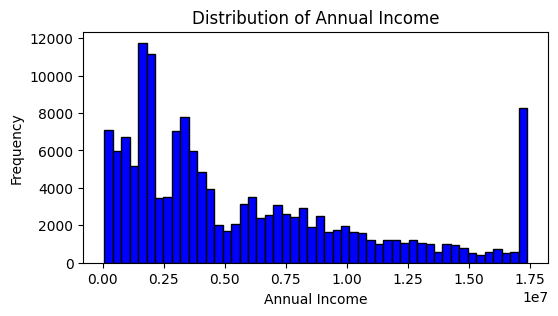

In [68]:
upper_limit = df['Annual_Income'].quantile(0.95)  # Extreme outliers

df['Annual_Income'] = df['Annual_Income'].apply(lambda x: min(x, upper_limit))

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.hist(df['Annual_Income'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()


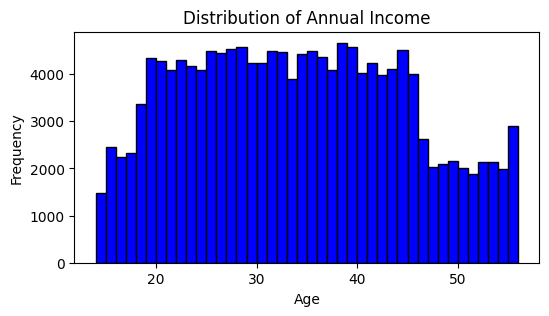

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.hist(df['Age'], bins=42, color='blue', edgecolor='black')
plt.title('Distribution of Annual Income')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

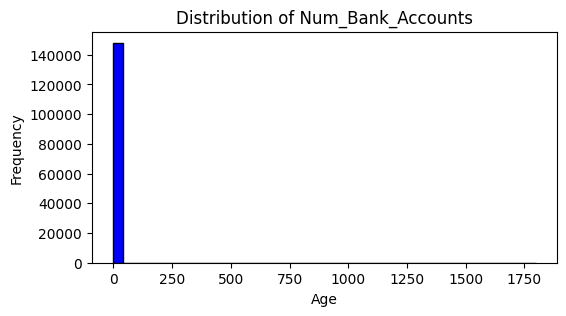

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.hist(df['Num_Bank_Accounts'], bins=42, color='blue', edgecolor='black')
plt.title('Distribution of Num_Bank_Accounts')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [87]:
# Define the upper bound based on a realistic maximum or a high percentile
upper_bound = df['Num_Bank_Accounts'].quantile(0.99)  # Example percentile

# Display outliers where the number of bank accounts is negative or higher than the upper bound
outliers = df[(df['Num_Bank_Accounts'] < 0) | (df['Num_Bank_Accounts'] > upper_bound)]
print(outliers['Num_Bank_Accounts'])

# Calculate the number of outliers
num_outliers = len(outliers)

print(f"Number of outliers in 'Num_Bank_Accounts': {num_outliers}")


267      1414
288      1231
339       572
356      1488
807       528
         ... 
49419     523
49583    1353
49643    1240
49933    1093
49981    1727
Name: Num_Bank_Accounts, Length: 1537, dtype: int64
Number of outliers in 'Num_Bank_Accounts': 1537


Consider the nature of Annual_Income. If it's reasonable to assume that missing values can be imputed based on other factors (like occupation or age), you might use mean/median imputation or a more sophisticated method like regression imputation.
If missing values are randomly distributed, mean/median imputation could be a simple and effective approach.

**2.5 Handling Outliers**

In [ ]:
from scipy import stats

data_types = df.dtypes
print("Data Types:")
print(data_types)

summary_stats = df.describe()
print("\nSummary Statistics:")
print(summary_stats)

outlier_columns = []
for column in df.columns:
    if np.issubdtype(df[column].dtype, np.number):  # Check if column is numeric
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if not outliers.empty:
            outlier_columns.append(column)
            print(f"\nOutliers in {column}:")
            print(outliers)
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

infinite_values = df.isin([np.inf, -np.inf]).sum()
print("\nInfinite Values:")
print(infinite_values)


In [ ]:
df['Delay_from_due_date'].isnull().sum()

**3. Splitting the data: reminder that original test.csv target variable was already dropped**

In [ ]:
train_set = df[df['Credit_Score'].notna()] #<--- split the data into train and test sets based on the Credit_Score column
test_set = df[df['Credit_Score'].isna()]

test_set = test_set.drop(columns=['Credit_Score'], errors='ignore')

X_train = train_set.drop('Credit_Score', axis=1)  # Features for training
y_train = train_set['Credit_Score']  # Target variable for training

# For the test set
X_test = test_set


**4. Transform, Normalize or Standardize Numerical Data:**

In [ ]:
X_train['Delay_from_due_date'].isnull().sum()

In [ ]:
numerical_columns.describe()

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew

def identify_log_transform_columns(numerical_columns, skewness_threshold=0.75):
    # Filter out binary/categorical columns
    non_binary_cols = numerical_columns.loc[:, numerical_columns.apply(lambda x: len(x.unique()) > 2)]

    # Initialize list to hold columns eligible for transformation
    eligible_for_transformation = []

    # Calculate skewness and select highly skewed features
    for column in non_binary_cols.columns:
        if not any(numerical_columns[column] < 0):
            skewness = skew(numerical_columns[column].dropna())
            if abs(skewness) > skewness_threshold:
                eligible_for_transformation.append(column)

    return eligible_for_transformation

# Assuming numerical_columns is defined and is a DataFrame
columns_to_transform = identify_log_transform_columns(numerical_columns)

print(f"Columns transformed: {columns_to_transform}")

In [ ]:
X_train['Delay_from_due_date'].isnull().sum()

In [ ]:
from scipy.stats.mstats import winsorize

for column in columns_to_transform:
    X_train[column] = np.log1p(X_train[column])
    X_test[column] = np.log1p(X_test[column])


winsorize_columns = ['Changed_Credit_Limit'] #<--- winsorize the Changed_Credit_Limit column

for column in winsorize_columns:
    X_train[column] = winsorize(X_train[column], limits=[0.01, 0.99])
    X_test[column] = winsorize(X_test[column], limits=[0.01, 0.99])

In [ ]:
X_train['Delay_from_due_date'].isnull().sum()

**5. Feature Engineering:**

In [ ]:
def age_binning(age):
    if age < 0:
        return 'Unknown'  #<--- binning the Age column
    elif age < 30:
        return 'Young'
    elif age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

X_train['Age_Binned'] = X_train['Age'].apply(age_binning)
X_test['Age_Binned'] = X_test['Age'].apply(age_binning)

age_binned = pd.get_dummies(X_train['Age_Binned'], prefix='Age')
X_train = pd.concat([X_train, age_binned], axis=1)

age_binned = pd.get_dummies(X_test['Age_Binned'], prefix='Age')
X_test = pd.concat([X_test, age_binned], axis=1)

X_train.drop('Age_Binned', axis=1, inplace=True)
X_test.drop('Age_Binned', axis=1, inplace=True)



In [ ]:
X_train['Annual_Income'] = pd.to_numeric(X_train['Annual_Income'], errors='coerce')
X_train['Outstanding_Debt'] = pd.to_numeric(X_train['Outstanding_Debt'], errors='coerce')
X_train['Income_to_Debt_Ratio'] = X_train['Annual_Income'] / (X_train['Outstanding_Debt'] + 0.01)

X_test['Annual_Income'] = pd.to_numeric(X_test['Annual_Income'], errors='coerce')
X_test['Outstanding_Debt'] = pd.to_numeric(X_test['Outstanding_Debt'], errors='coerce')
X_test['Income_to_Debt_Ratio'] = X_test['Annual_Income'] / (X_test['Outstanding_Debt'] + 0.01)

In [ ]:
def credit_utilization_category(ratio):
    if ratio < 30:
        return 'Low'
    elif ratio < 60:
        return 'Medium'
    else:
        return 'High'

X_train['Credit_Utilization_Ratio'] = pd.to_numeric(X_train['Credit_Utilization_Ratio'], errors='coerce')
X_train['Credit_Utilization_Category'] = X_train['Credit_Utilization_Ratio'].apply(credit_utilization_category)

X_test['Credit_Utilization_Ratio'] = pd.to_numeric(X_test['Credit_Utilization_Ratio'], errors='coerce')
X_test['Credit_Utilization_Category'] = X_test['Credit_Utilization_Ratio'].apply(credit_utilization_category)

credit_utilization_category_train = pd.get_dummies(X_train['Credit_Utilization_Category'], prefix='Credit_Utilization')
X_train = pd.concat([X_train, credit_utilization_category_train], axis=1)

credit_utilization_category_test = pd.get_dummies(X_test['Credit_Utilization_Category'], prefix='Credit_Utilization')
X_test = pd.concat([X_test, credit_utilization_category_test], axis=1)

X_train.drop('Credit_Utilization_Category', axis=1, inplace=True)
X_test.drop('Credit_Utilization_Category', axis=1, inplace=True)




In [ ]:
X_train['Monthly_Salary_Missing'] = X_train['Monthly_Inhand_Salary'].isnull().astype(int)

X_test['Monthly_Salary_Missing'] = X_test['Monthly_Inhand_Salary'].isnull().astype(int)


In [ ]:
X_train['Loan_to_Income_Ratio'] = X_train['Num_of_Loan'] / (X_train['Annual_Income'] + 0.01)
X_test['Loan_to_Income_Ratio'] = X_test['Num_of_Loan'] / (X_test['Annual_Income'] + 0.01)

In [ ]:
X_train['Normalized_Interest_Rate'] = X_train['Interest_Rate'] / (X_train['Credit_History_Age'] + 0.01)
X_test['Normalized_Interest_Rate'] = X_test['Interest_Rate'] / (X_test['Credit_History_Age'] + 0.01)

In [ ]:
X_train['Debt_to_Income_Ratio'] = X_train['Outstanding_Debt'] / (X_train['Annual_Income'] + 0.01)
X_test['Debt_to_Income_Ratio'] = X_test['Outstanding_Debt'] / (X_test['Annual_Income'] + 0.01)

In [ ]:
# <---the first few rows to verify
train_head = X_train.head()
test_head = X_test.head()

(train_head, test_head)

*6. Scaling the sets:*
**Decided to use RandomForest and LightGBM, which does not require scaling**

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

binary_columns = [col for col in df.columns if df[col].nunique() == 2]
columns_for_scaling = [col for col in numeric_columns if col not in binary_columns]

print("scaling needed:", columns_for_scaling)

print(df[columns_for_scaling].mean())
print(df[columns_for_scaling].std())   #<--- mean should be close to 0 and std should be close to 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[columns_for_scaling] = scaler.fit_transform(X_train[columns_for_scaling])

X_test_scaled = X_test.copy()
X_test_scaled[columns_for_scaling] = scaler.transform(X_test[columns_for_scaling])
print(X_train_scaled[columns_for_scaling].mean())
print(X_train_scaled[columns_for_scaling].std())   #<--- check again for training set
print(X_test_scaled[columns_for_scaling].mean())
print(X_test_scaled[columns_for_scaling].std())   #<--- check again for test set

In [ ]:
X_train['Delay_from_due_date'].isnull().sum()

**7. Feature Selection: Correlation, RandomForest Importance, RFECV**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Assuming X_train and y_train are already defined

## 1. Correlation Analysis
corr_matrix = X_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Training Data")
plt.show()

# Identify highly correlated features (e.g., above 0.85)
high_corr_var = [col for col in corr_matrix.columns if any(corr_matrix[col] > 0.85)]
print("Highly correlated variables:", high_corr_var)

## 2. Feature Importance with Random Forest
rf = RandomForestClassifier(n_jobs=12)
rf.fit(X_train, y_train)
feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.xticks(rotation=90)
plt.title("Feature Importances in Training Data")
plt.show()
print("Highly correlated variables:", feature_importances)

## 3. Recursive Feature Elimination with Cross-Validation (RFECV)
rfecv = RFECV(estimator=rf, step=5, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features:", rfecv.n_features_)

# Extract the mean test score for each number of features
mean_scores = rfecv.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (nb of correct classifications)")
plt.plot(range(1, len(mean_scores) + 1), mean_scores)
plt.show()

# Final selected features
selected_features = X_train.columns[rfecv.support_]
print("Selected Features:", selected_features)


In [ ]:
# Check for NaN values in each column of X_train
nan_counts = X_train.isna().sum()

# Display columns with NaN counts
print("NaN Counts per Column:")
print(nan_counts[nan_counts > 0])
